Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).
Người dùng chọn ảnh từ 3 ảnh bất kì

🎯 Chọn một ảnh để biến đổi:
1. boat.jpg
2. chua.jpg
3. colorful-ripe-tropical-fruits.jpg
4. ha-long-bay-in-vietnam.jpg
5. Kiwi-fruit.jpg
6. mountain.jpg
7. pagoda.jpg
8. papaya.jpg
9. quang_ninh.jpg
10. watermelon.jpg

🛠️ Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to / thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)



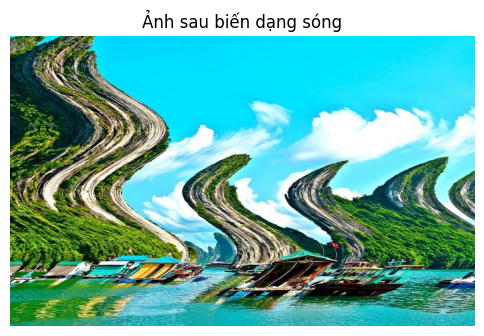

In [6]:
# 1. Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 2. Hàm hiển thị ảnh
def show_img(img, title="Ảnh kết quả"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

# 3. Lấy danh sách ảnh trong thư mục "exercise"
folder = "exercise"
images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png'))]

print("🎯 Chọn một ảnh để biến đổi:")
for i, img_name in enumerate(images):
    print(f"{i+1}. {img_name}")

choice = int(input("Nhập số tương ứng với ảnh bạn chọn (1/2/3): ")) - 1
img_path = os.path.join(folder, images[choice])
img = cv2.imread(img_path)

# 4. Menu lựa chọn phép biến đổi
print("""
🛠️ Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to / thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (warp)
""")
transform_choice = int(input("Nhập lựa chọn của bạn (1-5): "))

# 5. Thực hiện phép biến đổi
if transform_choice == 1:
    dx = int(input("Nhập số pixel tịnh tiến theo trục x: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục y: "))
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    translated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    show_img(translated, "Ảnh sau tịnh tiến")

elif transform_choice == 2:
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("Giữ reshape? (y/n): ").strip().lower() == 'y'
    center = (img.shape[1]//2, img.shape[0]//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    if reshape:
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        new_w = int((img.shape[0] * sin) + (img.shape[1] * cos))
        new_h = int((img.shape[0] * cos) + (img.shape[1] * sin))
        M[0, 2] += (new_w / 2) - center[0]
        M[1, 2] += (new_h / 2) - center[1]
        rotated = cv2.warpAffine(img, M, (new_w, new_h))
    else:
        rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    show_img(rotated, "Ảnh sau xoay")

elif transform_choice == 3:
    scale = float(input("Nhập hệ số phóng to / thu nhỏ (VD: 2.0 hoặc 0.5): "))
    resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    show_img(resized, "Ảnh sau zoom")

elif transform_choice == 4:
    sigma = float(input("Nhập giá trị sigma (độ mờ): "))
    ksize = int(6*sigma + 1)  # Kernel size phù hợp
    if ksize % 2 == 0:
        ksize += 1
    blurred = cv2.GaussianBlur(img, (ksize, ksize), sigma)
    show_img(blurred, "Ảnh sau làm mờ Gaussian")

elif transform_choice == 5:
    amp = float(input("Nhập biên độ sóng (amplitude): "))
    h, w = img.shape[:2]
    map_y, map_x = np.indices((h, w), dtype=np.float32)
    map_x += amp * np.sin(map_y / 30)
    warped = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    show_img(warped, "Ảnh sau biến dạng sóng")

else:
    print("❌ Lựa chọn không hợp lệ!")

# 6. Lưu ảnh kết quả nếu người dùng muốn
save = input("💾 Bạn có muốn lưu ảnh kết quả? (y/n): ").strip().lower()
if save == 'y':
    out_name = input("Nhập tên file lưu (không cần phần mở rộng): ")
    out_path = f"{out_name}.jpg"
    cv2.imwrite(out_path, img if transform_choice not in [1,2,3,4,5] else locals().get('translated', locals().get('rotated', locals().get('resized', locals().get('blurred', locals().get('warped', img))))))
    print(f"✅ Ảnh đã lưu thành {out_path}")
